In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
from ieee80211phy.transmitter.main import build_package, hex_to_bitstr, flip_byte_endian

In [2]:
    # Table I-22—Time domain representation of the short training sequence
    expect_short_train = [(0.023 + 0.023j), (-0.132 + 0.002j), (-0.013 - 0.079j), (0.143 - 0.013j), (0.092 + 0j),
                          (0.143 - 0.013j), (-0.013 - 0.079j), (-0.132 + 0.002j), (0.046 + 0.046j), (0.002 - 0.132j),
                          (-0.079 - 0.013j), (-0.013 + 0.143j), 0.092j, (-0.013 + 0.143j), (-0.079 - 0.013j),
                          (0.002 - 0.132j), (0.046 + 0.046j), (-0.132 + 0.002j), (-0.013 - 0.079j), (0.143 - 0.013j),
                          (0.092 + 0j), (0.143 - 0.013j), (-0.013 - 0.079j), (-0.132 + 0.002j), (0.046 + 0.046j),
                          (0.002 - 0.132j), (-0.079 - 0.013j), (-0.013 + 0.143j), 0.092j, (-0.013 + 0.143j),
                          (-0.079 - 0.013j), (0.002 - 0.132j), (0.046 + 0.046j), (-0.132 + 0.002j), (-0.013 - 0.079j),
                          (0.143 - 0.013j), (0.092 + 0j), (0.143 - 0.013j), (-0.013 - 0.079j), (-0.132 + 0.002j),
                          (0.046 + 0.046j), (0.002 - 0.132j), (-0.079 - 0.013j), (-0.013 + 0.143j), 0.092j,
                          (-0.013 + 0.143j), (-0.079 - 0.013j), (0.002 - 0.132j), (0.046 + 0.046j), (-0.132 + 0.002j),
                          (-0.013 - 0.079j), (0.143 - 0.013j), (0.092 + 0j), (0.143 - 0.013j), (-0.013 - 0.079j),
                          (-0.132 + 0.002j), (0.046 + 0.046j), (0.002 - 0.132j), (-0.079 - 0.013j), (-0.013 + 0.143j),
                          0.092j, (-0.013 + 0.143j), (-0.079 - 0.013j), (0.002 - 0.132j), (0.046 + 0.046j),
                          (-0.132 + 0.002j), (-0.013 - 0.079j), (0.143 - 0.013j), (0.092 + 0j), (0.143 - 0.013j),
                          (-0.013 - 0.079j), (-0.132 + 0.002j), (0.046 + 0.046j), (0.002 - 0.132j), (-0.079 - 0.013j),
                          (-0.013 + 0.143j), 0.092j, (-0.013 + 0.143j), (-0.079 - 0.013j), (0.002 - 0.132j),
                          (0.046 + 0.046j), (-0.132 + 0.002j), (-0.013 - 0.079j), (0.143 - 0.013j), (0.092 + 0j),
                          (0.143 - 0.013j), (-0.013 - 0.079j), (-0.132 + 0.002j), (0.046 + 0.046j), (0.002 - 0.132j),
                          (-0.079 - 0.013j), (-0.013 + 0.143j), 0.092j, (-0.013 + 0.143j), (-0.079 - 0.013j),
                          (0.002 - 0.132j), (0.046 + 0.046j), (-0.132 + 0.002j), (-0.013 - 0.079j), (0.143 - 0.013j),
                          (0.092 + 0j), (0.143 - 0.013j), (-0.013 - 0.079j), (-0.132 + 0.002j), (0.046 + 0.046j),
                          (0.002 - 0.132j), (-0.079 - 0.013j), (-0.013 + 0.143j), 0.092j, (-0.013 + 0.143j),
                          (-0.079 - 0.013j), (0.002 - 0.132j), (0.046 + 0.046j), (-0.132 + 0.002j), (-0.013 - 0.079j),
                          (0.143 - 0.013j), (0.092 + 0j), (0.143 - 0.013j), (-0.013 - 0.079j), (-0.132 + 0.002j),
                          (0.046 + 0.046j), (0.002 - 0.132j), (-0.079 - 0.013j), (-0.013 + 0.143j), 0.092j,
                          (-0.013 + 0.143j), (-0.079 - 0.013j), (0.002 - 0.132j), (0.046 + 0.046j), (-0.132 + 0.002j),
                          (-0.013 - 0.079j), (0.143 - 0.013j), (0.092 + 0j), (0.143 - 0.013j), (-0.013 - 0.079j),
                          (-0.132 + 0.002j), (0.046 + 0.046j), (0.002 - 0.132j), (-0.079 - 0.013j), (-0.013 + 0.143j),
                          0.092j, (-0.013 + 0.143j), (-0.079 - 0.013j), (0.002 - 0.132j), (0.046 + 0.046j),
                          (-0.132 + 0.002j), (-0.013 - 0.079j), (0.143 - 0.013j), (0.092 + 0j), (0.143 - 0.013j),
                          (-0.013 - 0.079j), (-0.132 + 0.002j), (0.046 + 0.046j), (0.002 - 0.132j), (-0.079 - 0.013j),
                          (-0.013 + 0.143j), 0.092j, (-0.013 + 0.143j), (-0.079 - 0.013j), (0.002 - 0.132j)]

    # Table I-23—Time domain representation of the long training sequence
    expect_long_train = [(-0.055 + 0.023j), (0.012 - 0.098j), (0.092 - 0.106j), (-0.092 - 0.115j), (-0.003 - 0.054j),
                         (0.075 + 0.074j), (-0.127 + 0.021j), (-0.122 + 0.017j), (-0.035 + 0.151j), (-0.056 + 0.022j),
                         (-0.06 - 0.081j), (0.07 - 0.014j), (0.082 - 0.092j), (-0.131 - 0.065j), (-0.057 - 0.039j),
                         (0.037 - 0.098j), (0.062 + 0.062j), (0.119 + 0.004j), (-0.022 - 0.161j), (0.059 + 0.015j),
                         (0.024 + 0.059j), (-0.137 + 0.047j), (0.001 + 0.115j), (0.053 - 0.004j), (0.098 + 0.026j),
                         (-0.038 + 0.106j), (-0.115 + 0.055j), (0.06 + 0.088j), (0.021 - 0.028j), (0.097 - 0.083j),
                         (0.04 + 0.111j), (-0.005 + 0.12j), (0.156 + 0j), (-0.005 - 0.12j), (0.04 - 0.111j),
                         (0.097 + 0.083j), (0.021 + 0.028j), (0.06 - 0.088j), (-0.115 - 0.055j), (-0.038 - 0.106j),
                         (0.098 - 0.026j), (0.053 + 0.004j), (0.001 - 0.115j), (-0.137 - 0.047j), (0.024 - 0.059j),
                         (0.059 - 0.015j), (-0.022 + 0.161j), (0.119 - 0.004j), (0.062 - 0.062j), (0.037 + 0.098j),
                         (-0.057 + 0.039j), (-0.131 + 0.065j), (0.082 + 0.092j), (0.07 + 0.014j), (-0.06 + 0.081j),
                         (-0.056 - 0.022j), (-0.035 - 0.151j), (-0.122 - 0.017j), (-0.127 - 0.021j), (0.075 - 0.074j),
                         (-0.003 + 0.054j), (-0.092 + 0.115j), (0.092 + 0.106j), (0.012 + 0.098j), (-0.156 + 0j),
                         (0.012 - 0.098j), (0.092 - 0.106j), (-0.092 - 0.115j), (-0.003 - 0.054j), (0.075 + 0.074j),
                         (-0.127 + 0.021j), (-0.122 + 0.017j), (-0.035 + 0.151j), (-0.056 + 0.022j), (-0.06 - 0.081j),
                         (0.07 - 0.014j), (0.082 - 0.092j), (-0.131 - 0.065j), (-0.057 - 0.039j), (0.037 - 0.098j),
                         (0.062 + 0.062j), (0.119 + 0.004j), (-0.022 - 0.161j), (0.059 + 0.015j), (0.024 + 0.059j),
                         (-0.137 + 0.047j), (0.001 + 0.115j), (0.053 - 0.004j), (0.098 + 0.026j), (-0.038 + 0.106j),
                         (-0.115 + 0.055j), (0.06 + 0.088j), (0.021 - 0.028j), (0.097 - 0.083j), (0.04 + 0.111j),
                         (-0.005 + 0.12j), (0.156 + 0j), (-0.005 - 0.12j), (0.04 - 0.111j), (0.097 + 0.083j),
                         (0.021 + 0.028j), (0.06 - 0.088j), (-0.115 - 0.055j), (-0.038 - 0.106j), (0.098 - 0.026j),
                         (0.053 + 0.004j), (0.001 - 0.115j), (-0.137 - 0.047j), (0.024 - 0.059j), (0.059 - 0.015j),
                         (-0.022 + 0.161j), (0.119 - 0.004j), (0.062 - 0.062j), (0.037 + 0.098j), (-0.057 + 0.039j),
                         (-0.131 + 0.065j), (0.082 + 0.092j), (0.07 + 0.014j), (-0.06 + 0.081j), (-0.056 - 0.022j),
                         (-0.035 - 0.151j), (-0.122 - 0.017j), (-0.127 - 0.021j), (0.075 - 0.074j), (-0.003 + 0.054j),
                         (-0.092 + 0.115j), (0.092 + 0.106j), (0.012 + 0.098j), (-0.156 + 0j), (0.012 - 0.098j),
                         (0.092 - 0.106j), (-0.092 - 0.115j), (-0.003 - 0.054j), (0.075 + 0.074j), (-0.127 + 0.021j),
                         (-0.122 + 0.017j), (-0.035 + 0.151j), (-0.056 + 0.022j), (-0.06 - 0.081j), (0.07 - 0.014j),
                         (0.082 - 0.092j), (-0.131 - 0.065j), (-0.057 - 0.039j), (0.037 - 0.098j), (0.062 + 0.062j),
                         (0.119 + 0.004j), (-0.022 - 0.161j), (0.059 + 0.015j), (0.024 + 0.059j), (-0.137 + 0.047j),
                         (0.001 + 0.115j), (0.053 - 0.004j), (0.098 + 0.026j), (-0.038 + 0.106j), (-0.115 + 0.055j),
                         (0.06 + 0.088j), (0.021 - 0.028j), (0.097 - 0.083j), (0.04 + 0.111j), (-0.005 + 0.12j)]

        
    # Table I-24—Time domain representation of the SIGNAL field (1 symbol)
    expect_signal_field = [(0.109+0j), (0.033-0.044j), (-0.002-0.038j), (-0.081+0.084j), (0.007-0.1j), (-0.001-0.113j), (-0.021-0.005j), (0.136-0.105j), (0.098-0.044j), (0.011-0.002j), (-0.033+0.044j), (-0.06+0.124j), (0.01+0.097j), -0.008j, (0.018-0.083j), (-0.069+0.027j), (-0.219+0j), (-0.069-0.027j), (0.018+0.083j), 0.008j, (0.01-0.097j), (-0.06-0.124j), (-0.033-0.044j), (0.011+0.002j), (0.098+0.044j), (0.136+0.105j), (-0.021+0.005j), (-0.001+0.113j), (0.007+0.1j), (-0.081-0.084j), (-0.002+0.038j), (0.033+0.044j), (0.062+0j), (0.057+0.052j), (0.016+0.174j), (0.035+0.116j), (-0.051-0.202j), (0.011+0.036j), (0.089+0.209j), (-0.049-0.008j), (-0.035+0.044j), (0.017-0.059j), (0.053-0.017j), (0.099+0.1j), (0.034-0.148j), (-0.003-0.094j), (-0.12+0.042j), (-0.136-0.07j), (-0.031+0j), (-0.136+0.07j), (-0.12-0.042j), (-0.003+0.094j), (0.034+0.148j), (0.099-0.1j), (0.053+0.017j), (0.017+0.059j), (-0.035-0.044j), (-0.049+0.008j), (0.089-0.209j), (0.011-0.036j), (-0.051+0.202j), (0.035-0.116j), (0.016-0.174j), (0.057-0.052j), (0.062+0j), (0.033-0.044j), (-0.002-0.038j), (-0.081+0.084j), (0.007-0.1j), (-0.001-0.113j), (-0.021-0.005j), (0.136-0.105j), (0.098-0.044j), (0.011-0.002j), (-0.033+0.044j), (-0.06+0.124j), (0.01+0.097j), -0.008j, (0.018-0.083j), (-0.069+0.027j)]
    
    # Table I-25—Time domain representation of the DATA field: symbol 1of 6
    expected_data1 = [(-0.139+0.05j), (0.004+0.014j), (0.011-0.1j), (-0.097-0.02j), (0.062+0.081j), (0.124+0.139j), (0.104-0.015j), (0.173-0.14j), (-0.04+0.006j), (-0.133+0.009j), (-0.002-0.043j), (-0.047+0.092j), (-0.109+0.082j), (-0.024+0.01j), (0.096+0.019j), (0.019-0.023j), (-0.087-0.049j), (0.002+0.058j), (-0.021+0.228j), (-0.103+0.023j), (-0.019-0.175j), (0.018+0.132j), (-0.071+0.16j), (-0.153-0.062j), (-0.107+0.028j), (0.055+0.14j), (0.07+0.103j), (-0.056+0.025j), (-0.043+0.002j), (0.016-0.118j), (0.026-0.071j), (0.033+0.177j), (0.02-0.021j), (0.035-0.088j), (-0.008+0.101j), (-0.035-0.01j), (0.065+0.03j), (0.092-0.034j), (0.032-0.123j), (-0.018+0.092j), -0.006j, (-0.006-0.056j), (-0.019+0.04j), (0.053-0.131j), (0.022-0.133j), (0.104-0.032j), (0.163-0.045j), (-0.105-0.03j), (-0.11-0.069j), (-0.008-0.092j), (-0.049-0.043j), (0.085-0.017j), (0.09+0.063j), (0.015+0.153j), (0.049+0.094j), (0.011+0.034j), (-0.012+0.012j), (-0.015-0.017j), (-0.061+0.031j), (-0.07-0.04j), (0.011-0.109j), (0.037-0.06j), (-0.003-0.178j), (-0.007-0.128j), (-0.059+0.1j), (0.004+0.014j), (0.011-0.1j), (-0.097-0.02j), (0.062+0.081j), (0.124+0.139j), (0.104-0.015j), (0.173-0.14j), (-0.04+0.006j), (-0.133+0.009j), (-0.002-0.043j), (-0.047+0.092j), (-0.109+0.082j), (-0.024+0.01j), (0.096+0.019j), (0.019-0.023j)]
    
    # Table I-26—Time domain representation of the DATA field: symbol 2 of 6
    expected_data2 = [(-0.058+0.016j), (-0.096-0.045j), (-0.11+0.003j), (-0.07+0.216j), (-0.04+0.059j), (0.01-0.056j), (0.034+0.065j), (0.117+0.033j), (0.078-0.133j), (-0.043-0.146j), (0.158-0.071j), (0.254-0.021j), (0.068+0.117j), (-0.044+0.114j), (-0.035+0.041j), (0.085+0.07j), (0.12+0.01j), (0.057+0.055j), (0.063+0.188j), (0.091+0.149j), (-0.017-0.039j), (-0.078-0.075j), (0.049+0.079j), (-0.014-0.007j), (0.03-0.027j), (0.08+0.054j), (-0.186-0.067j), (-0.039-0.027j), (0.043-0.072j), (-0.092-0.089j), (0.029+0.105j), (-0.144+0.003j), (-0.069-0.041j), (0.132+0.057j), (-0.126+0.07j), (-0.031+0.109j), (0.161-0.009j), (0.056-0.046j), (-0.004+0.028j), (-0.049+0j), (-0.078-0.005j), (0.015-0.087j), (0.149-0.104j), (-0.021-0.051j), (-0.154-0.106j), (0.024+0.03j), (0.046+0.123j), (-0.004-0.098j), (-0.061-0.128j), (-0.024-0.038j), (0.066-0.048j), (-0.067+0.027j), (0.054-0.05j), (0.171-0.049j), (-0.108+0.132j), (-0.161-0.019j), (-0.07-0.072j), (-0.177+0.049j), (-0.172-0.05j), (0.051-0.075j), (0.122-0.057j), (0.009-0.044j), (-0.012-0.021j), (0.004+0.009j), (-0.03+0.081j), (-0.096-0.045j), (-0.11+0.003j), (-0.07+0.216j), (-0.04+0.059j), (0.01-0.056j), (0.034+0.065j), (0.117+0.033j), (0.078-0.133j), (-0.043-0.146j), (0.158-0.071j), (0.254-0.021j), (0.068+0.117j), (-0.044+0.114j), (-0.035+0.041j), (0.085+0.07j)]
    
    # Table I-27—Time domain representation of the DATA field: symbol 3 of 6
    expected_data3 = [(0.001+0.011j), (-0.099-0.048j), (0.054-0.196j), (0.124+0.035j), (0.092+0.045j), (-0.037-0.066j), (-0.021-0.004j), (0.042-0.065j), (0.061+0.048j), (0.046+0.004j), (-0.063-0.045j), (-0.102+0.152j), (-0.039-0.019j), (-0.005-0.106j), (0.083+0.031j), (0.226+0.028j), (0.14-0.01j), (-0.132-0.033j), (-0.116+0.088j), (0.023+0.052j), (-0.171-0.08j), (-0.246-0.025j), (-0.062-0.038j), (-0.055-0.062j), (-0.004-0.06j), (0.034+0j), (-0.03+0.021j), (0.075-0.122j), (0.043-0.08j), (-0.022+0.041j), (0.026+0.013j), (-0.031-0.018j), (0.059+0.008j), (0.109+0.078j), (0.002+0.101j), (-0.016+0.054j), (-0.059+0.07j), (0.017+0.114j), (0.104-0.034j), (-0.024-0.059j), (-0.081+0.051j), (-0.04-0.069j), (-0.069+0.058j), (-0.067+0.117j), (0.007-0.131j), (0.009+0.028j), (0.075+0.117j), (0.118+0.03j), (-0.041+0.148j), (0.005+0.098j), (0.026+0.002j), (-0.116+0.045j), (-0.02+0.084j), (0.101+0.006j), (0.205-0.064j), (0.073-0.063j), (-0.174-0.118j), (-0.024+0.026j), (-0.041+0.129j), (-0.042-0.053j), (0.148-0.126j), (-0.03-0.049j), (-0.015-0.021j), (0.089-0.069j), (-0.119+0.011j), (-0.099-0.048j), (0.054-0.196j), (0.124+0.035j), (0.092+0.045j), (-0.037-0.066j), (-0.021-0.004j), (0.042-0.065j), (0.061+0.048j), (0.046+0.004j), (-0.063-0.045j), (-0.102+0.152j), (-0.039-0.019j), (-0.005-0.106j), (0.083+0.031j), (0.226+0.028j)]
    
    # Table I-28—Time domain representation of the DATA field: symbol 4 of 6
    expected_data4 = [(0.085-0.065j), (0.034-0.142j), (0.004-0.012j), (0.126-0.043j), (0.055+0.068j), (-0.02+0.077j), (0.008-0.056j), (-0.034+0.046j), (-0.04-0.134j), (-0.056-0.131j), (0.014+0.097j), (0.045-0.009j), (-0.113-0.17j), (-0.065-0.23j), (0.065-0.011j), (0.011+0.048j), (-0.091-0.059j), (-0.11+0.024j), (0.074-0.034j), (0.124+0.022j), (-0.037+0.071j), (0.015+0.002j), (0.028+0.099j), (-0.062+0.068j), (0.064+0.016j), (0.078+0.156j), (0.009+0.219j), (0.147+0.024j), (0.106+0.03j), (-0.08+0.143j), (-0.049-0.1j), (-0.036-0.082j), (-0.089+0.021j), (-0.07-0.029j), (-0.086+0.048j), (-0.066-0.015j), (-0.024+0.002j), (-0.03-0.023j), (-0.032+0.02j), (-0.002+0.212j), (0.158-0.024j), (0.141-0.119j), (-0.146+0.058j), (-0.155+0.083j), (-0.002-0.03j), (0.018-0.129j), (0.012-0.018j), (-0.008-0.037j), (0.031+0.04j), (0.023+0.097j), (0.014-0.039j), (0.05+0.019j), (-0.072-0.141j), (-0.023-0.051j), (0.024+0.099j), (-0.127-0.116j), (0.094+0.102j), (0.183+0.098j), (-0.04-0.02j), (0.065+0.077j), (0.088-0.147j), (-0.039-0.059j), (-0.057+0.124j), (-0.077+0.02j), (0.03-0.12j), (0.034-0.142j), (0.004-0.012j), (0.126-0.043j), (0.055+0.068j), (-0.02+0.077j), (0.008-0.056j), (-0.034+0.046j), (-0.04-0.134j), (-0.056-0.131j), (0.014+0.097j), (0.045-0.009j), (-0.113-0.17j), (-0.065-0.23j), (0.065-0.011j), (0.011+0.048j), (-0.026-0.021j), (-0.002+0.041j), (0.001+0.071j), (-0.037-0.117j)]
    
    # Table I-29—Time domain representation of the DATA field: symbol 5 of 6
    expected_data5 = [(-0.106-0.062j), (0.002+0.057j), (-0.008-0.011j), (0.019+0.072j), (0.016+0.059j), (-0.065-0.077j), (0.142-0.062j), (0.087+0.025j), (-0.003-0.103j), (0.107-0.152j), (-0.054+0.036j), (-0.03-0.003j), (0.058-0.02j), (-0.028+0.007j), (-0.027-0.099j), (0.049-0.075j), (0.174+0.031j), (0.134+0.156j), (0.06+0.077j), (-0.01-0.022j), (-0.084+0.04j), (-0.074+0.011j), (-0.163+0.054j), (-0.052-0.008j), (0.076-0.042j), (0.043+0.101j), (0.058-0.018j), (0.003-0.09j), (0.059-0.018j), (0.023-0.031j), (0.007-0.017j), (0.066-0.017j), (-0.135-0.098j), (-0.056-0.081j), (0.089+0.154j), (0.12+0.122j), (0.102+0.001j), (-0.141+0.102j), (0.006-0.011j), (0.057-0.039j), (-0.059+0.066j), (0.132+0.111j), (0.012+0.114j), (0.047-0.106j), (0.16-0.099j), (-0.076+0.084j), (-0.049+0.073j), (0.005-0.086j), (-0.052-0.108j), (-0.073+0.129j), (-0.129-0.034j), (-0.153-0.111j), (-0.193+0.098j), (-0.107-0.068j), (0.004-0.009j), (-0.039+0.024j), (-0.054-0.079j), (0.024+0.084j), (0.052-0.002j), (0.028-0.044j), (0.04+0.018j), (-0.002+0.041j), (0.001+0.071j), (-0.037-0.117j), (-0.106-0.062j), (0.002+0.057j), (-0.008-0.011j), (0.019+0.072j), (0.016+0.059j), (-0.065-0.077j), (0.142-0.062j), (0.087+0.025j), (-0.003-0.103j), (0.107-0.152j), (-0.054+0.036j), (-0.03-0.003j)]
    
    # Table I-30—Time domain representation of the DATA field: symbol 6 of 6
    expected_data6 = [(0.029-0.026j), (-0.047+0.077j), (-0.007-0.002j), (0.05-0.021j), (0.046-0.04j), (-0.061-0.099j), (-0.121+0.008j), (0.014+0.05j), (0.145+0.034j), (0.001-0.046j), (-0.058-0.121j), (0.04+0.001j), (-0.029+0.041j), (0.002-0.066j), (0.015-0.054j), (0.01-0.029j), (0.008-0.119j), (-0.134+0.002j), (0.064+0.079j), (0.095-0.102j), (-0.069-0.014j), (0.156+0.037j), (0.047-0.008j), (-0.076+0.025j), (0.117-0.143j), (0.056-0.042j), (0.002+0.075j), (-0.039-0.058j), (-0.092+0.014j), (-0.041+0.047j), (-0.058+0.092j), (0.012+0.154j), (0.079+0.091j), (-0.067+0.017j), (-0.102-0.032j), (0.039+0.084j), (-0.036+0.014j), (-0.001-0.046j), (0.195+0.131j), (0.039+0.067j), (-0.007+0.045j), (0.051+0.008j), (-0.074-0.109j), (-0.033+0.07j), (-0.028+0.176j), (-0.041+0.045j), (0.014-0.084j), (0.054-0.04j), (0.11-0.02j), (0.014-0.021j), (0.006+0.139j), (0.008+0.011j), (-0.06-0.04j), (0.008+0.179j), (0.008+0.02j), (0.044-0.114j), (0.021-0.015j), (-0.008-0.052j), (0.091-0.109j), (-0.025-0.04j), (-0.049+0.006j), (-0.043-0.041j), (-0.178-0.026j), (-0.073-0.057j), -0.031j, (-0.047+0.077j), (-0.007-0.002j), (0.05-0.021j), (0.046-0.04j), (-0.061-0.099j), (-0.121+0.008j), (0.014+0.05j), (0.145+0.034j), (0.001-0.046j), (-0.058-0.121j), (0.04+0.001j), (-0.029+0.041j), (0.002-0.066j), (0.015-0.054j), (0.01-0.029j), (0.004-0.059j)]
    
    expected = np.concatenate([expect_short_train, expect_long_train, expect_signal_field, expected_data1, expected_data2, expected_data3, expected_data4, expected_data5, expected_data6])

In [3]:
data = '0x0402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B6'
bits = flip_byte_endian(hex_to_bitstr(data))

tx = build_package(bits, data_rate=36)
tx = np.round(tx, 3)

<IPython.core.display.Javascript object>


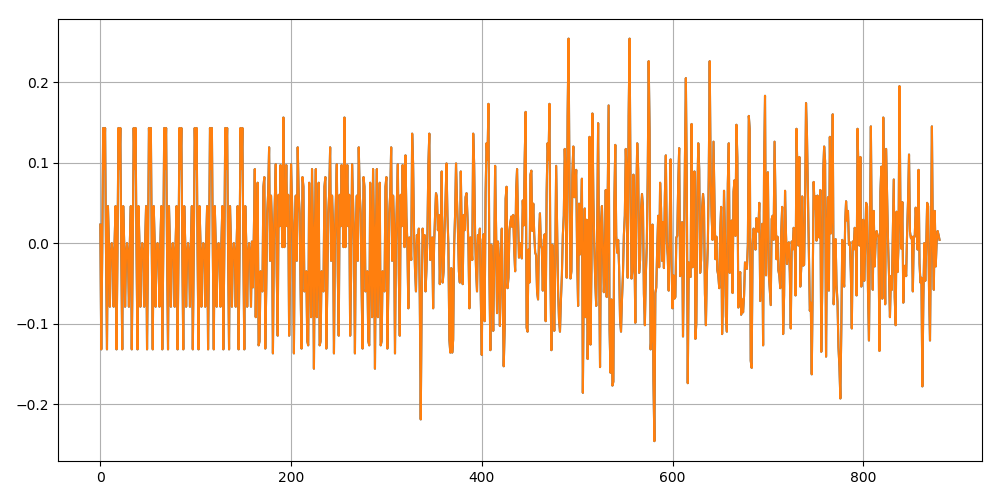

<IPython.core.display.Javascript object>


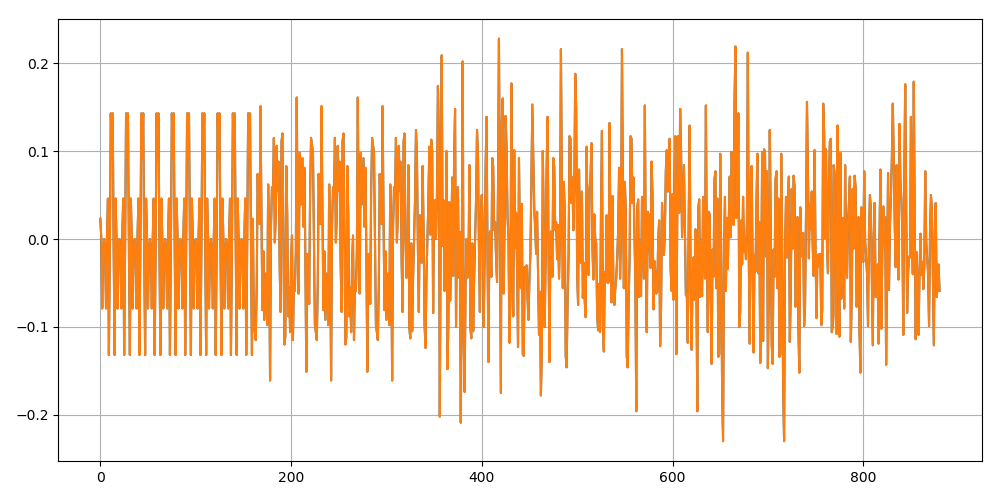

In [4]:
plt.figure(figsize=(10,5))
plt.plot(tx.real)
plt.plot(expected.real)
plt.tight_layout()
# plt.xlim([310, 330])
plt.grid()

plt.figure(figsize=(10,5))
plt.plot(tx.imag)
plt.plot(expected.imag)
plt.tight_layout()
# plt.xlim([310, 330])
plt.grid()

In [5]:
np.testing.assert_equal(expected, tx)

<IPython.core.display.Javascript object>


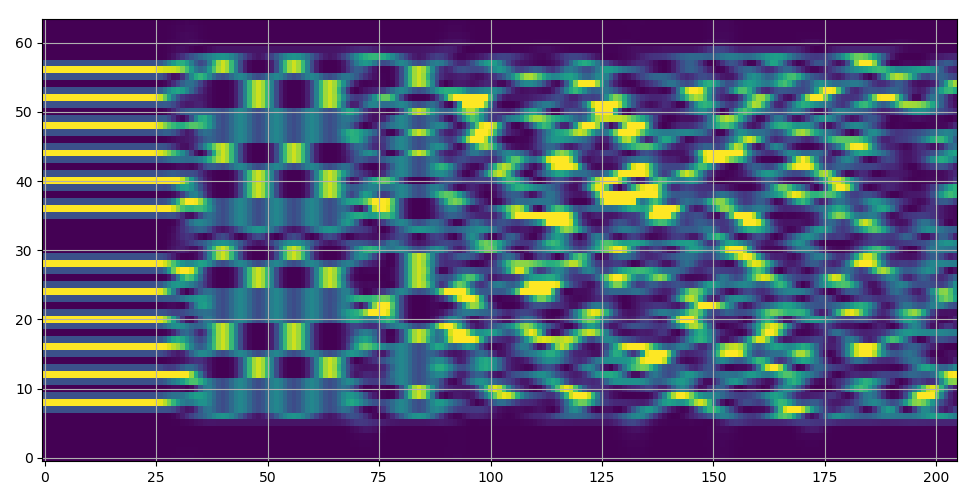

In [98]:
from scipy.signal import spectral
fft_points = 64
_, _, out = spectral.spectrogram(tx, 1, nperseg=fft_points, scaling='spectrum', return_onesided=False,
                                 detrend=False,
                                 noverlap=fft_points * 0.95, window='hann')

out = np.roll(out, fft_points // 2, axis=0)
def imshow_rescale(im, rescale=True):
    
    def show_plot():
        import matplotlib.pyplot as plt
        plt.tight_layout()
        plt.grid()
        if plt.gca().get_legend_handles_labels() != ([], []):
            plt.legend()
        plt.show()
    import matplotlib.pyplot as plt
    plt.figure(figsize=(9.75, 5))
    im = np.array(im)
    if rescale:
        from skimage.exposure import exposure
        p2, p98 = np.percentile(im, (2, 98))
        im = exposure.rescale_intensity(im, in_range=(p2, p98))

    plt.imshow(im, interpolation='nearest', aspect='auto', origin='lower')
    show_plot()

imshow_rescale(out, rescale=True)

/usr/lib/python3.7/site-packages/scipy/signal/spectral.py:1623: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '


<IPython.core.display.Javascript object>


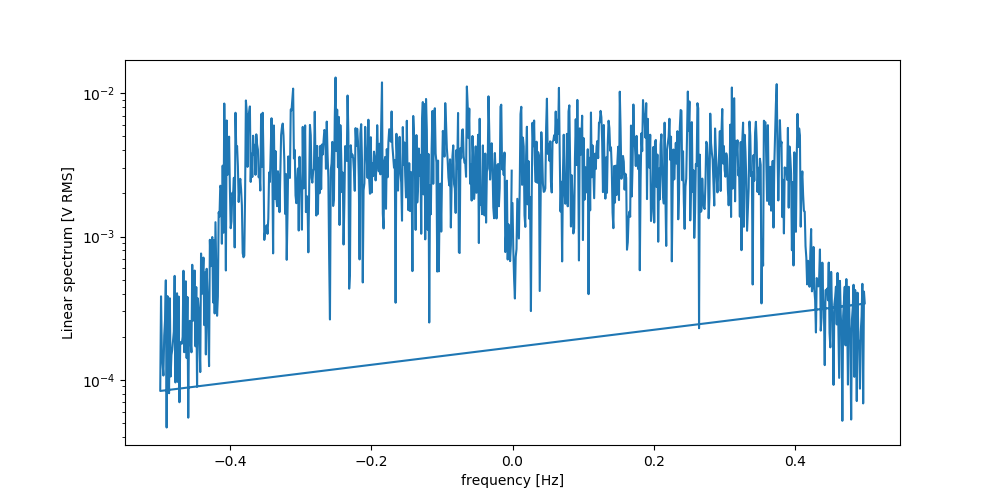

In [40]:
from scipy import signal
f, Pxx_spec = signal.periodogram(tx, 1, scaling='spectrum', detrend=None)
plt.figure(figsize=(10,5))
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()

In [106]:
data = '0x0402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B6'
bits = flip_byte_endian(hex_to_bitstr(data))

tx_no_window = build_package(bits, data_rate=36)
tx_no_window_up = signal.resample_poly(tx_no_window, 2, 1)

/usr/lib/python3.7/site-packages/scipy/signal/signaltools.py:2383: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return y[keep]


In [110]:
data = '0x0402002E006008CD37A60020D6013CF1006008AD3BAF00004A6F792C2062726967687420737061726B206F6620646976696E6974792C0A4461756768746572206F6620456C797369756D2C0A466972652D696E73697265642077652074726561673321B6'
bits = flip_byte_endian(hex_to_bitstr(data))

tx = build_package(bits, data_rate=36)
tx_up = signal.resample_poly(tx, 2, 1)

/usr/lib/python3.7/site-packages/scipy/signal/signaltools.py:2383: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return y[keep]


<IPython.core.display.Javascript object>


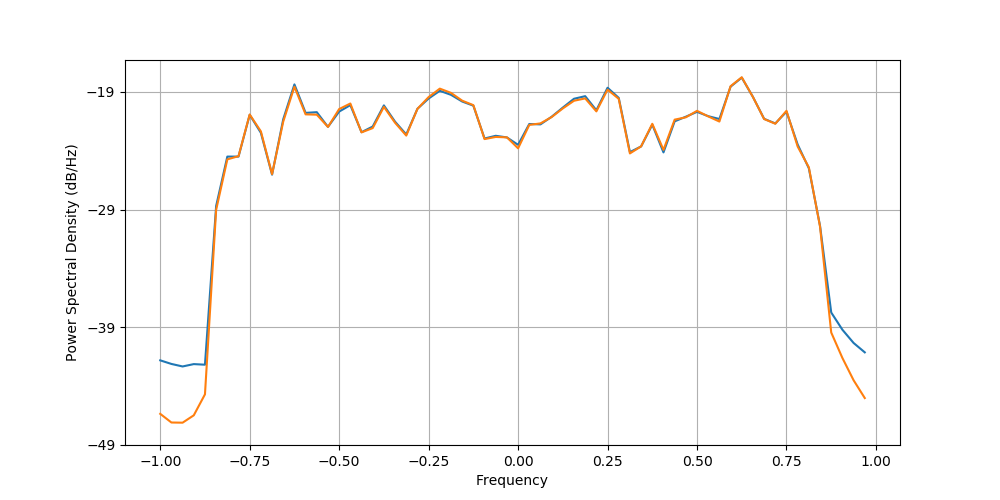

(array([2.31595905e-05, 1.95455217e-05, 1.94811222e-05, 2.25000173e-05,
        3.39155157e-05, 1.25242477e-03, 3.35950464e-03, 3.57849574e-03,
        8.07937060e-03, 5.81095768e-03, 2.51762311e-03, 7.03923077e-03,
        1.39073859e-02, 8.10582502e-03, 8.05662993e-03, 6.33669216e-03,
        8.99015309e-03, 1.00229060e-02, 5.69812556e-03, 6.19562732e-03,
        9.39203160e-03, 6.87529054e-03, 5.35199954e-03, 9.03013711e-03,
        1.13643315e-02, 1.34065344e-02, 1.23389674e-02, 1.05919684e-02,
        9.70528346e-03, 4.99722323e-03, 5.21071011e-03, 5.16954538e-03,
        4.17180701e-03, 6.59339410e-03, 6.79260387e-03, 7.68767852e-03,
        9.10321039e-03, 1.05769322e-02, 1.10730479e-02, 8.59427909e-03,
        1.31449174e-02, 1.09816104e-02, 3.77549667e-03, 4.33351295e-03,
        6.73803903e-03, 4.04566998e-03, 7.30869025e-03, 7.65203911e-03,
        8.68202425e-03, 7.79048933e-03, 7.04258317e-03, 1.40531675e-02,
        1.67438984e-02, 1.13825055e-02, 7.39751723e-03, 6.747351

In [128]:
plt.figure(figsize=(10,5))
noverlap = 0
NFFT = 64
window = plt.mlab.window_hanning
plt.psd(tx_no_window, NFFT=NFFT, noverlap=noverlap, window=window)
plt.psd(tx, NFFT=NFFT, noverlap=noverlap, window=window)

<IPython.core.display.Javascript object>


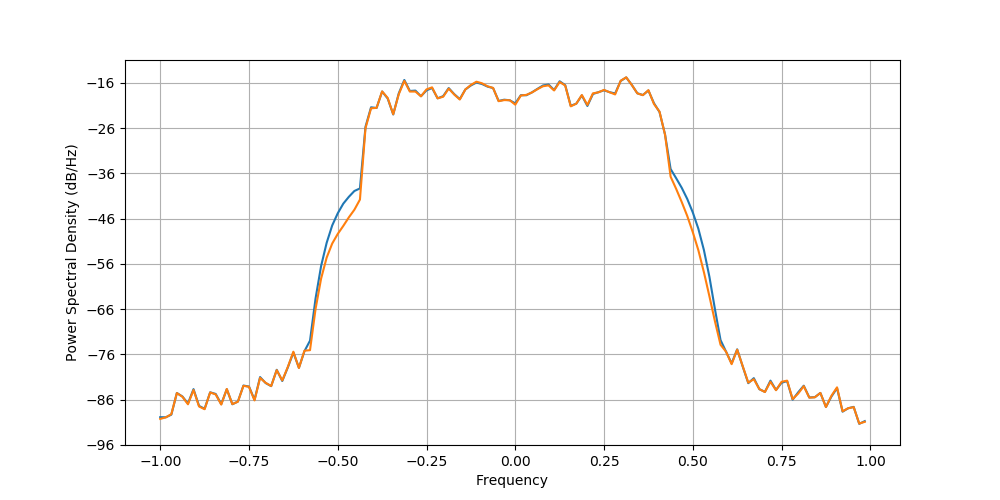

(array([9.46829260e-10, 1.02305558e-09, 1.20564751e-09, 3.52357163e-09,
        2.91585807e-09, 1.99238895e-09, 4.12190722e-09, 1.78142073e-09,
        1.55125002e-09, 3.63800320e-09, 3.28870354e-09, 1.96523582e-09,
        4.34693260e-09, 2.01276336e-09, 2.27189136e-09, 5.09293558e-09,
        4.85307633e-09, 2.42893698e-09, 7.63847110e-09, 5.94691938e-09,
        5.04464626e-09, 1.13138455e-08, 6.70186164e-09, 1.32924722e-08,
        2.89078287e-08, 1.26164580e-08, 3.04921465e-08, 3.12563785e-08,
        2.54911806e-07, 1.19543096e-06, 3.46614791e-06, 7.09541848e-06,
        1.15761163e-05, 1.74117429e-05, 2.68787975e-05, 3.96687952e-05,
        6.64061174e-05, 2.50521740e-03, 6.88846044e-03, 7.07418704e-03,
        1.62958825e-02, 1.17044548e-02, 5.10856695e-03, 1.41285896e-02,
        2.78633596e-02, 1.61758338e-02, 1.61881126e-02, 1.27153038e-02,
        1.80692977e-02, 2.00429857e-02, 1.14492404e-02, 1.24280582e-02,
        1.88104205e-02, 1.38908496e-02, 1.07851002e-02, 1.797367

In [136]:
plt.figure(figsize=(10,5))
noverlap = 0
NFFT = 128
window = plt.mlab.window_hanning
plt.psd(tx_no_window_up, NFFT=NFFT, noverlap=noverlap, window=window, scale_by_freq=True)
plt.psd(tx_up, NFFT=NFFT, noverlap=noverlap, window=window)

<IPython.core.display.Javascript object>


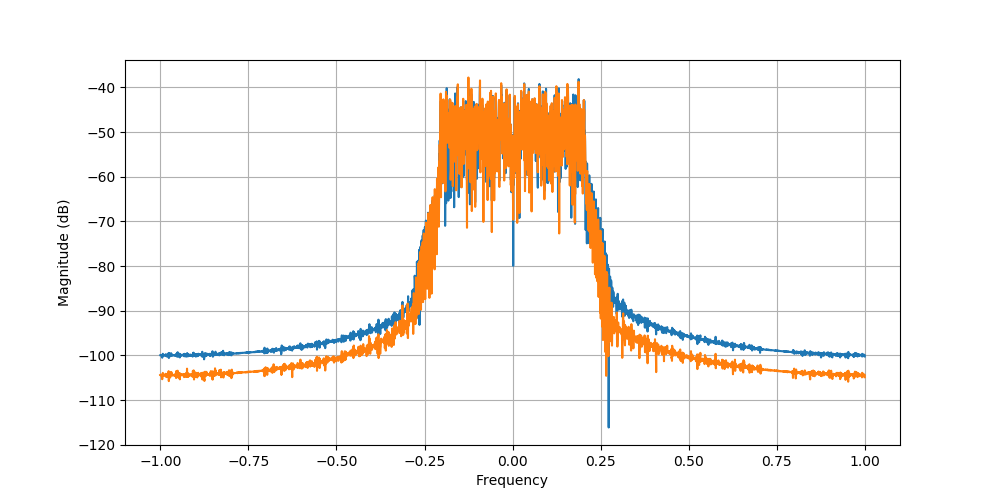

In [91]:
plt.figure(figsize=(10,5))
window = plt.mlab.window_none
plt.magnitude_spectrum(tx_no_window_up, window=window, scale='dB')
plt.magnitude_spectrum(tx_up, window=window, scale='dB')
plt.grid()

<IPython.core.display.Javascript object>


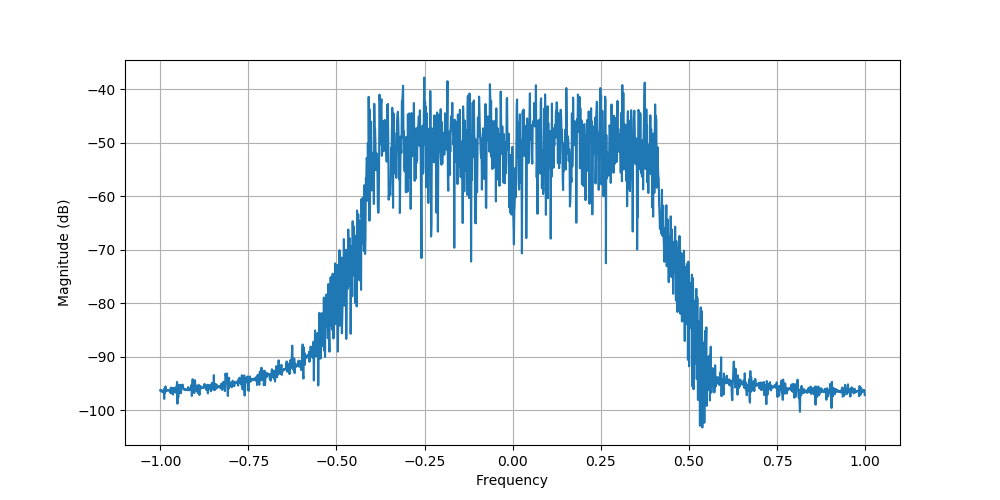

In [46]:
plt.figure(figsize=(10,5))
plt.magnitude_spectrum(txup,
                                           window=plt.mlab.window_none,
                                           scale='dB')
plt.grid()

# Start

In [ ]:
symbols = 0.707 * np.array([1 - 1j, -1 + 1j, 1 + 1j, -1 + 1j, 1 - 1j, 1 + 1j, -1 - 1j, -1 + 1j])

In [ ]:
plt.figure()
plt.plot(symbols.real)
plt.plot(symbols.imag)

In [ ]:
ifft = np.fft.ifft(symbols) * 8
plt.figure()
plt.plot(ifft.real)
plt.plot(ifft.imag)
plt.grid()
plt.show()

In [ ]:
fft = np.fft.fft(ifft)
plt.figure()
plt.stem(fft.real)
plt.stem(fft.imag, '--')
plt.show()

# Short training symbols

In [ ]:
pos = [ 0,    0, 0, 0, 
       -1-1j, 0, 0, 0,
       -1-1j, 0, 0, 0,
        1+1j, 0, 0, 0,
        1+1j, 0, 0, 0,
        1+1j, 0, 0, 0,
        1+1j, 0, 0, 0,
        0,    0, 0, 0]


neg = [ 0,    0, 0, 0, 
        0,    0, 0, 0,
        1+1j, 0, 0, 0,
       -1-1j, 0, 0, 0,
        1+1j, 0, 0, 0,
       -1-1j, 0, 0, 0,
       -1-1j, 0, 0, 0,
        1+1j, 0, 0, 0,]

short_train = np.sqrt(13/6) * np.array(neg + pos)
plt.figure()
plt.plot(np.abs(short_train))
plt.show()

plt.figure()
plt.plot(np.angle(short_train))
plt.show()

short_train_time = []
for i in range(160):
    v = 0.0
    for m in range(-32, 32): 
        v += short_train[m+32] * np.exp(1j * 2*np.pi*i*m/64)
    short_train_time.append(v)
    
short_train_time = np.array(short_train_time)
    
plt.figure()
plt.plot(short_train_time.real)
plt.plot(short_train_time.imag)
plt.show()

# Long training

In [ ]:
expected = np.array([(-0.078 + 0j), (0.012 - 0.098j), (0.092 - 0.106j), (-0.092 - 0.115j), (-0.003 - 0.054j),
                (0.075 + 0.074j), (-0.127 + 0.021j), (-0.122 + 0.017j), (-0.035 + 0.151j), (-0.056 + 0.022j),
                (-0.06 - 0.081j), (0.07 - 0.014j), (0.082 - 0.092j), (-0.131 - 0.065j), (-0.057 - 0.039j),
                (0.037 - 0.098j), (0.062 + 0.062j), (0.119 + 0.004j), (-0.022 - 0.161j), (0.059 + 0.015j),
                (0.024 + 0.059j), (-0.137 + 0.047j), (0.001 + 0.115j), (0.053 - 0.004j), (0.098 + 0.026j),
                (-0.038 + 0.106j), (-0.115 + 0.055j), (0.06 + 0.088j), (0.021 - 0.028j), (0.097 - 0.083j),
                (0.04 + 0.111j), (-0.005 + 0.12j), (0.156 + 0j), (-0.005 - 0.12j), (0.04 - 0.111j), (0.097 + 0.083j),
                (0.021 + 0.028j), (0.06 - 0.088j), (-0.115 - 0.055j), (-0.038 - 0.106j), (0.098 - 0.026j),
                (0.053 + 0.004j), (0.001 - 0.115j), (-0.137 - 0.047j), (0.024 - 0.059j), (0.059 - 0.015j),
                (-0.022 + 0.161j), (0.119 - 0.004j), (0.062 - 0.062j), (0.037 + 0.098j), (-0.057 + 0.039j),
                (-0.131 + 0.065j), (0.082 + 0.092j), (0.07 + 0.014j), (-0.06 + 0.081j), (-0.056 - 0.022j),
                (-0.035 - 0.151j), (-0.122 - 0.017j), (-0.127 - 0.021j), (0.075 - 0.074j), (-0.003 + 0.054j),
                (-0.092 + 0.115j), (0.092 + 0.106j), (0.012 + 0.098j), (-0.156 + 0j), (0.012 - 0.098j),
                (0.092 - 0.106j), (-0.092 - 0.115j), (-0.003 - 0.054j), (0.075 + 0.074j), (-0.127 + 0.021j),
                (-0.122 + 0.017j), (-0.035 + 0.151j), (-0.056 + 0.022j), (-0.06 - 0.081j), (0.07 - 0.014j),
                (0.082 - 0.092j), (-0.131 - 0.065j), (-0.057 - 0.039j), (0.037 - 0.098j), (0.062 + 0.062j),
                (0.119 + 0.004j), (-0.022 - 0.161j), (0.059 + 0.015j), (0.024 + 0.059j), (-0.137 + 0.047j),
                (0.001 + 0.115j), (0.053 - 0.004j), (0.098 + 0.026j), (-0.038 + 0.106j), (-0.115 + 0.055j),
                (0.06 + 0.088j), (0.021 - 0.028j), (0.097 - 0.083j), (0.04 + 0.111j), (-0.005 + 0.12j), (0.156 + 0j),
                (-0.005 - 0.12j), (0.04 - 0.111j), (0.097 + 0.083j), (0.021 + 0.028j), (0.06 - 0.088j),
                (-0.115 - 0.055j), (-0.038 - 0.106j), (0.098 - 0.026j), (0.053 + 0.004j), (0.001 - 0.115j),
                (-0.137 - 0.047j), (0.024 - 0.059j), (0.059 - 0.015j), (-0.022 + 0.161j), (0.119 - 0.004j),
                (0.062 - 0.062j), (0.037 + 0.098j), (-0.057 + 0.039j), (-0.131 + 0.065j), (0.082 + 0.092j),
                (0.07 + 0.014j), (-0.06 + 0.081j), (-0.056 - 0.022j), (-0.035 - 0.151j), (-0.122 - 0.017j),
                (-0.127 - 0.021j), (0.075 - 0.074j), (-0.003 + 0.054j), (-0.092 + 0.115j), (0.092 + 0.106j),
                (0.012 + 0.098j), (-0.156 + 0j), (0.012 - 0.098j), (0.092 - 0.106j), (-0.092 - 0.115j),
                (-0.003 - 0.054j), (0.075 + 0.074j), (-0.127 + 0.021j), (-0.122 + 0.017j), (-0.035 + 0.151j),
                (-0.056 + 0.022j), (-0.06 - 0.081j), (0.07 - 0.014j), (0.082 - 0.092j), (-0.131 - 0.065j),
                (-0.057 - 0.039j), (0.037 - 0.098j), (0.062 + 0.062j), (0.119 + 0.004j), (-0.022 - 0.161j),
                (0.059 + 0.015j), (0.024 + 0.059j), (-0.137 + 0.047j), (0.001 + 0.115j), (0.053 - 0.004j),
                (0.098 + 0.026j), (-0.038 + 0.106j), (-0.115 + 0.055j), (0.06 + 0.088j), (0.021 - 0.028j),
                (0.097 - 0.083j), (0.04 + 0.111j), (-0.005 + 0.12j), (0.078 + 0j)], dtype=np.complex64)

plt.figure()
plt.plot(expected.real)
plt.plot(np.round(full_long_time.real/64,3))
# plt.plot(expected.imag)
plt.show()

plt.figure()
plt.plot(expected.imag)
plt.plot(np.round(full_long_time.imag/64,3))
# plt.plot(expected.imag)
plt.show()

d = np.round(full_long_time.astype(np.complex64)/64,3)
for i, (a, b) in enumerate(zip(expected, d)):
    print(i, a , b)
    np.testing.assert_equal(a, b)

In [ ]:
long_train = [0, 0, 0, 0, 0, 0, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 
        0,
        1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

plt.figure()
plt.stem(list(range(-32, 32)), np.abs(long_train))
plt.show()

In [ ]:
long_time = []
for i in range(64):
    v = 0.0
    for m in range(-32, 32): 
        v += long_train[m+32] * np.exp(1j * 2*np.pi*i*m/64)
    long_time.append(v)

full_long_time = np.array(long_time[32:] +  long_time + long_time + long_time)[:161]
full_long_time[0] *= 0.5 
full_long_time[160] *= 0.5 

In [ ]:
np.mean(full_long_time)

In [ ]:
plt.figure()
plt.plot(full_long_time.real)
plt.plot(full_long_time.imag)
plt.show()

# Mapper

In [ ]:
BPSK_LUT = np.array([-1, 
                     1])

QPSK_LUT = np.array([-1.0, 
                     1.0]) / np.sqrt(2)

QAM16_LUT = np.array([-3,
                      -1,
                      1,
                      3]) / np.sqrt(10)

QAM64_LUT = np.array([-7,
                      -5,               
                      -3,
                      -1,
                      1,
                      3,
                     5,
                     7]) / np.sqrt(42)

def mapper(bits, bits_per_symbol=1):
    bits = np.resize(bits, (-1, bits_per_symbol))
    out = []
    for x in bits:
        if bits_per_symbol == 1:
            symbol = BPSK_LUT[x] + 0.0j
        elif bits_per_symbol == 2:
            symbol = QPSK_LUT[x] + QPSK_LUT[x]*1j
        

        
bits = [0, 1]
symbols = mapper(bits, bits_per_symbol=1)
print(symbols)

# plt.figure()
# plt.title('BPSK')
# plt.ylabel('Q')
# plt.xlabel('I')
# plt.scatter(BPSK_LUT.real, BPSK_LUT.imag)
# plt.grid()
# plt.show()

# QPSK_LUT = np.array([-1.0 - 1.0j, 
#                      -1.0 + 1.0j, 
#                      1.0 - 1.0j, 
#                      1.0 + 1.0j]) / np.sqrt(2)

# plt.figure()
# plt.title('QPSK')
# plt.ylabel('Q')
# plt.xlabel('I')
# plt.scatter(QPSK_LUT.real, QPSK_LUT.imag)
# plt.grid()
# plt.show()

# QAM16_LUT = np.array([-1.0 - 1.0j, 
#                      -1.0 + 1.0j, 
#                      1.0 - 1.0j, 
#                      1.0 + 1.0j]) / np.sqrt(2)

# plt.figure()
# plt.title('QPSK')
# plt.ylabel('Q')
# plt.xlabel('I')
# plt.scatter(QPSK_LUT.real, QPSK_LUT.imag)
# plt.grid()
# plt.show()

In [ ]:
import numpy as np
ifft_in = np.zeros(64)
ifft_in[1:7, 1:7] = ind

In [ ]:
ifft_in

In [ ]:
input = np.array([0j, 0j, 0j, 0j, 0j, 0j, (-0.316 + 0.316j), (-0.316 + 0.316j), (0.316 + 0.316j), (-0.949 - 0.949j),
            (0.316 + 0.949j), (1 + 0j), (0.316 + 0.316j), (0.316 - 0.949j), (-0.316 - 0.949j), (-0.316 + 0.316j),
            (-0.949 + 0.316j), (-0.949 - 0.949j), (-0.949 - 0.949j), (0.949 + 0.316j), (0.316 + 0.316j),
            (-0.949 - 0.316j), (-0.949 - 0.316j), (-0.949 - 0.316j), (-0.949 - 0.949j), (1 + 0j), (0.949 - 0.316j),
            (0.949 + 0.949j), (-0.949 - 0.316j), (0.316 - 0.316j), (-0.949 - 0.316j), (-0.949 + 0.949j), 0j,
            (-0.316 + 0.949j), (0.316 + 0.949j), (-0.949 + 0.316j), (0.949 - 0.949j), (0.316 + 0.316j),
            (-0.316 - 0.316j), (1 + 0j), (-0.316 + 0.949j), (0.949 - 0.316j), (-0.949 - 0.316j), (0.949 + 0.316j),
            (-0.316 + 0.949j), (0.949 + 0.316j), (0.949 - 0.316j), (0.949 - 0.949j), (-0.316 - 0.949j),
            (-0.949 + 0.316j), (-0.949 - 0.949j), (-0.949 - 0.949j), (-0.949 - 0.949j), (-1 + 0j), (0.316 - 0.316j),
            (0.949 + 0.316j), (-0.949 + 0.316j), (-0.316 + 0.949j), (0.316 - 0.316j), 0j, 0j, 0j, 0j, 0j])
expect =  np.array([(-0.139 + 0.05j), (0.004 + 0.014j), (0.011 - 0.1j), (-0.097 - 0.02j), (0.062 + 0.081j),
                (0.124 + 0.139j), (0.104 - 0.015j), (0.173 - 0.14j), (-0.04 + 0.006j), (-0.133 + 0.009j),
                (-0.002 - 0.043j), (-0.047 + 0.092j), (-0.109 + 0.082j), (-0.024 + 0.01j), (0.096 + 0.019j),
                (0.019 - 0.023j), (-0.087 - 0.049j), (0.002 + 0.058j), (-0.021 + 0.228j), (-0.103 + 0.023j),
                (-0.019 - 0.175j), (0.018 + 0.132j), (-0.071 + 0.16j), (-0.153 - 0.062j), (-0.107 + 0.028j),
                (0.055 + 0.14j), (0.07 + 0.103j), (-0.056 + 0.025j), (-0.043 + 0.002j), (0.016 - 0.118j),
                (0.026 - 0.071j), (0.033 + 0.177j), (0.02 - 0.021j), (0.035 - 0.088j), (-0.008 + 0.101j),
                (-0.035 - 0.01j), (0.065 + 0.03j), (0.092 - 0.034j), (0.032 - 0.123j), (-0.018 + 0.092j), -0.006j,
                (-0.006 - 0.056j), (-0.019 + 0.04j), (0.053 - 0.131j), (0.022 - 0.133j), (0.104 - 0.032j),
                (0.163 - 0.045j), (-0.105 - 0.03j), (-0.11 - 0.069j), (-0.008 - 0.092j), (-0.049 - 0.043j),
                (0.085 - 0.017j), (0.09 + 0.063j), (0.015 + 0.153j), (0.049 + 0.094j), (0.011 + 0.034j),
                (-0.012 + 0.012j), (-0.015 - 0.017j), (-0.061 + 0.031j), (-0.07 - 0.04j), (0.011 - 0.109j),
                (0.037 - 0.06j), (-0.003 - 0.178j), (-0.007 - 0.128j), (-0.059 + 0.1j), (0.004 + 0.014j),
                (0.011 - 0.1j), (-0.097 - 0.02j), (0.062 + 0.081j), (0.124 + 0.139j), (0.104 - 0.015j),
                (0.173 - 0.14j), (-0.04 + 0.006j), (-0.133 + 0.009j), (-0.002 - 0.043j), (-0.047 + 0.092j),
                (-0.109 + 0.082j), (-0.024 + 0.01j), (0.096 + 0.019j), (0.019 - 0.023j)])

def ifft_guard(symbols):
    """ Takes 64 input symbols in Freq domain and outputs 80 outputs in time domain.
    Includes Guard interval"""
    print(len(symbols))
    ifft = np.fft.ifft(symbols, 64)
    result = np.concatenate([ifft[48:], ifft])
    return result.astype(np.complex64)

output = ifft_guard(input)
# np.testing.assert_equal(expect, output)

In [ ]:
plt.figure()
plt.plot(expect.real)
plt.plot(output.real)
# plt.plot(expected.imag)
plt.show()

# plt.figure()
# plt.plot(expected.imag)
# plt.plot(np.round(full_long_time.imag/64,3))
# # plt.plot(expected.imag)
# plt.show()